### Importing stuffs

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
import math

#### Implement 2 Laplacian Mask, Minimum Variance Laplacian, Laplacian of Gaussian, and Difference of Gaussian(inhibitory sigma=1, excitatory sigma=3, kernel size 11x11).
#### Please list the kernels and the thresholds(for zero crossing) you used.
##### Threshold Values listed below are for reference:
(僅供參考，同學可自己找出 Edge Image 品質最佳的門檻值threshold value)
* Laplace Mask1 (0, 1, 0, 1, -4, 1, 0, 1, 0): 15
* Laplace Mask2 (1, 1, 1, 1, -8, 1, 1, 1, 1)
* Minimum variance Laplacian: 20
* Laplace of Gaussian: 3000
* Difference of Gaussian: 1


### Announcement

* You can use any programing language to implement homework, however, you'll get zero point if you just call existing library.
* Threshold Values listed above are for reference, you can choose your own values if you want.

### Importing image 

In [5]:
lena=cv2.imread('lena.bmp')

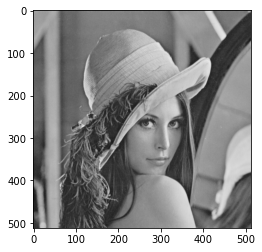

In [37]:
plt.imshow(lena)

In [7]:
def To3D2D(img):
    re_img=np.zeros((img.shape[0],img.shape[1]), dtype=np.int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            re_img[i,j]=img[i,j,0]
    return re_img

### Laplace Mask1 (0, 1, 0, 1, -4, 1, 0, 1, 0) (15)

In [89]:
def mask(image,thr,arr):
    
    shift=int((arr.shape[0]-1)/2)
    img=To3D2D(image)
    L=img.shape[0]
    P=img.shape[1]
    new_img=np.zeros((L,P), dtype=np.int)
    m_img=np.ones((L,P), dtype=np.int)*255
    pad_img=np.pad(img, shift, mode='edge')
    
    for l in range(L):
        for p in range(P):
            ll=l+shift
            pp=p+shift
            
            count=0
            for r in range(-shift,shift+1):
                for c in range(-shift,shift+1):
                    count=count+(arr[r+shift,c+shift]*pad_img[ll+r,pp+c])
            if(count>=thr):
                new_img[l,p]=1
            elif(count<=-thr):
                new_img[l,p]=-1
            else:
                new_img[l,p]=0
    pad_n_img=np.pad(new_img, 1, mode='edge')
    for l in range(L):
        for p in range(P):
            ll=l+1
            pp=p+1            
            count=0
            if(pad_n_img[ll,pp]==1):
                for r in range(-1,1+1):
                    for c in range(-1,1+1):
                        if(pad_n_img[ll+r,pp+c]==-1):
                            m_img[l,p]=0
                            count=1
                            break
                    if(count==1):
                        break
    re_img=np.stack((m_img,m_img,m_img), axis = -1)           
    return re_img        

In [4]:
Laplace_m=np.array([[0 , 1 ,0]
                   ,[1 ,-4 ,1]
                   ,[0 , 1 ,0]])

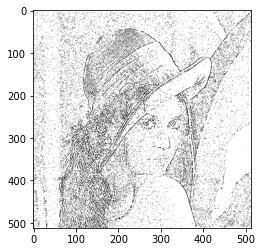

In [15]:
Laplace_img=mask(lena,15,Laplace_m)
plt.imshow(Laplace_img)

### Laplace Mask2 (1, 1, 1, 1, -8, 1, 1, 1, 1) (15)

In [19]:
Laplace_m2=np.array([[1 , 1 ,1]
                   ,[1 , -8 ,1]
                   ,[1 , 1 ,1]])*1/3

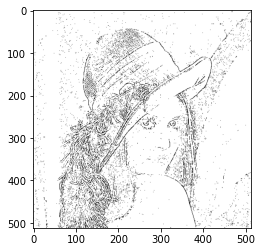

In [20]:
Laplace2_img=mask(lena,15,Laplace_m2)
plt.imshow(Laplace2_img)

### Minimum-variance Laplacian (20)

In [21]:
mini_v_Lap=np.array([[2 , -1 ,2]
                   ,[-1 , -4 ,-1]
                   ,[2 , -1 ,2]])*1/3

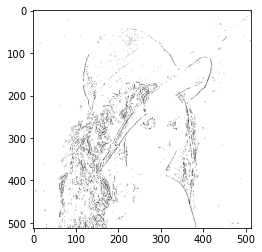

In [22]:
mini_v_Lap_img=mask(lena,20,mini_v_Lap)
plt.imshow(mini_v_Lap_img)

### Laplacian of Gaussian (3000)

In [91]:
gua_Lap_m=np.array([[0  , 0 , 0 ,-1 , -1, -2, -1, -1,   0,  0,  0]
                    ,[0  , 0 ,-2 ,-4 , -8, -9, -8, -4,  -2,  0,  0]
                    ,[0  ,-2 ,-7 ,-15,-22,-23,-22,-15,  -7, -2,  0]
                    ,[-1 ,-4 ,-15,-24,-14, -1,-14,-24, -15, -4, -1]
                    ,[-1 ,-8 ,-22,-14, 52,103, 52,-14, -22, -8, -1]
                    ,[-2 ,-9 ,-23, -1,103,178,103, -1, -23, -9, -2]
                    ,[-1 ,-8 ,-22,-14, 52,103, 52,-14, -22, -8, -1]
                    ,[-1 ,-4 ,-15,-24,-14, -1,-14,-24, -15, -4, -1]
                    ,[0  ,-2 ,-7 ,-15,-22,-23,-22,-15,  -7, -2,  0]
                    ,[0  , 0 ,-2 ,-4 , -8, -9, -8, -4,  -2,  0,  0]
                    ,[0  , 0 , 0 ,-1 , -1, -2, -1, -1,   0,  0,  0]])

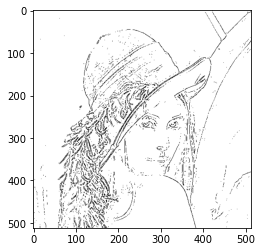

In [92]:
gua_Lap_img=mask(lena,3000,gua_Lap_m)
plt.imshow(gua_Lap_img)

### Difference of Gaussian (1)

In [97]:
diff_Lap_m=np.array([
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-8, -13, -17, 15, 160, 283, 160, 15, -17, -13, -8],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1]])

In [98]:
diff_Lap_m

array([[ -1,  -3,  -4,  -6,  -7,  -8,  -7,  -6,  -4,  -3,  -1],
       [ -3,  -5,  -8, -11, -13, -13, -13, -11,  -8,  -5,  -3],
       [ -4,  -8, -12, -16, -17, -17, -17, -16, -12,  -8,  -4],
       [ -6, -11, -16, -16,   0,  15,   0, -16, -16, -11,  -6],
       [ -7, -13, -17,   0,  85, 160,  85,   0, -17, -13,  -7],
       [ -8, -13, -17,  15, 160, 283, 160,  15, -17, -13,  -8],
       [ -7, -13, -17,   0,  85, 160,  85,   0, -17, -13,  -7],
       [ -6, -11, -16, -16,   0,  15,   0, -16, -16, -11,  -6],
       [ -4,  -8, -12, -16, -17, -17, -17, -16, -12,  -8,  -4],
       [ -3,  -5,  -8, -11, -13, -13, -13, -11,  -8,  -5,  -3],
       [ -1,  -3,  -4,  -6,  -7,  -8,  -7,  -6,  -4,  -3,  -1]])

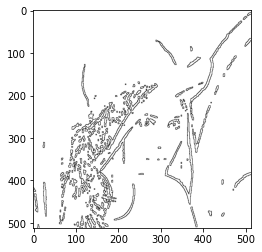

In [94]:
diff_Lap_img=mask(lena,1,diff_Lap_m)
plt.imshow(diff_Lap_img)

In [95]:
cv2.imwrite('HW10-1(Laplace m1 15).jpg', Laplace_img)
cv2.imwrite('HW10-2(Laplace m2 15).jpg', Laplace2_img)
cv2.imwrite('HW10-3(Minimum_variance Lap 20).jpg', mini_v_Lap_img)
cv2.imwrite('HW10-4(Lap Gaussian 3000).jpg', gua_Lap_img)
cv2.imwrite('HW10-5(Diff Gaussian 1).jpg', diff_Lap_img)


True